# Análise de Dados de um Shopping Center (FICTÍCIO)

### Objetivo
Este projeto visa responder perguntas estratégicas relacionadas ao desempenho e operações do shopping, com base em dados coletados das vendas, clientes e promoções. A análise é dividida em quatro áreas principais de interesse do cliente:

### O Que o Cliente Quer Saber
1. **Perfil dos Clientes**  
   - Quem são os principais clientes?  
   - Quais são suas características (gênero, idade, preferências de pagamento, etc.)?  
   - Como melhorar a fidelidade e atrair novos públicos?

2. **Análise das Vendas**  
   - Quais produtos e categorias são mais vendidos?
   - Quais períodos (estações) geram mais receita?  

3. **Experiência dos Clientes**  
   - O que os clientes avaliam sobre os produtos?  
   - Quais aspectos precisam de melhoria com base nas avaliações?  

4. **Logística e Operações**  
   - Quais regiões geram mais vendas?  
   - Qual é o tipo de frete mais utilizado e preferido pelos clientes?  
   - Há problemas em estoque ou logística que precisam ser otimizados?

### Ferramentas Utilizadas
- **Python**: Para análise de dados (Pandas) e visualização (Matplotlib, Seaborn).  
- **Google Colab**: Estruturação e apresentação do projeto.  

### Resultados Esperados
Esta análise fornecerá insights valiosos para tomada de decisão, incluindo:  
- Estratégias para aumentar vendas e fidelidade.  
- Ajustes na logística e operação.  
- Melhorias na experiência do cliente, alinhadas às avaliações e preferências.  

### Relevância
Com esta análise, gestores e equipes poderão implementar ações mais assertivas, otimizando os processos e gerando maior retorno financeiro e satisfação dos clientes.


#IMPORTAÇÕES E TRATAMENTO DE DADOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('shopping_trends.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.columns = ['id_cliente', 'Idade', 'Genero', 'item_comprado', 'categoria', 'Valor da Compra (USD)', 'Localizacao', 'tamanho', 'cor', 'estaçao', 'avaliacao_produto', 'status_assinatura', 'metodo_pagamento', 'tipo de frete', 'desconto_aplicado', 'codigo promocional usado', 'compras_anteriores', 'metodo pagamento preferido', 'frequencia de compras']

In [5]:
df.shape

(3900, 19)

In [6]:
df.isnull().sum()

id_cliente                    0
Idade                         0
Genero                        0
item_comprado                 0
categoria                     0
Valor da Compra (USD)         0
Localizacao                   0
tamanho                       0
cor                           0
estaçao                       0
avaliacao_produto             0
status_assinatura             0
metodo_pagamento              0
tipo de frete                 0
desconto_aplicado             0
codigo promocional usado      0
compras_anteriores            0
metodo pagamento preferido    0
frequencia de compras         0
dtype: int64

In [ ]:
# Dados duplicados
df[df.duplicated(['id_cliente'],keep=False)]

,id_cliente,Idade,Genero,item_comprado,categoria,Valor da Compra (USD),Localizacao,tamanho,cor,estaçao,avaliacao_produto,status_assinatura,metodo_pagamento,tipo de frete,desconto_aplicado,codigo promocional usado,compras_anteriores,metodo pagamento preferido,frequencia de compras


#ÁNALISE EXPLORATÓRIA

In [8]:
#Idade
round(df['Idade'].describe())
#sem plobemas aparente

count    3900.0
mean       44.0
std        15.0
min        18.0
25%        31.0
50%        44.0
75%        57.0
max        70.0
Name: Idade, dtype: float64

#PERFIL DOS CLIENTES

<Axes: ylabel='Idade'>

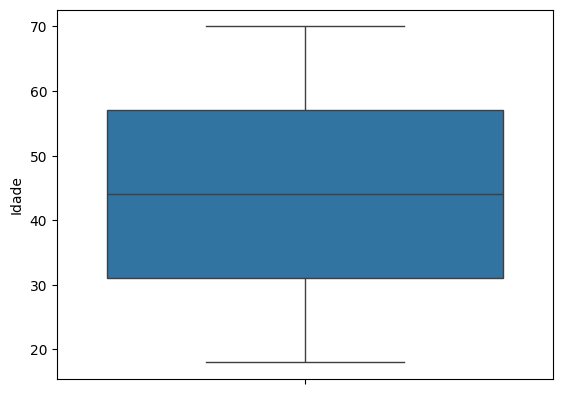

In [9]:
sns.boxplot(df['Idade'])

<Axes: xlabel='Faixa_Etaria'>

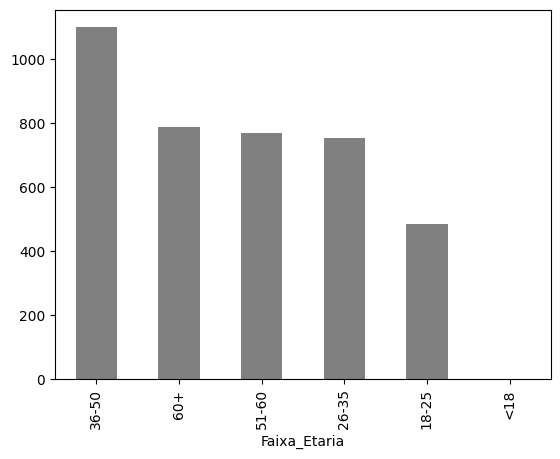

In [10]:
#Idade
#Dividindo os clientes por faixa-etária
bins = [0, 18, 25, 35, 50, 60, 100]
labels = ['<18', '18-25', '26-35', '36-50', '51-60', '60+']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)
faixa_idade = df['Faixa_Etaria'].value_counts()

#Para csv
# faixa_idade.to_csv('faixa_idade.csv', index=False)

faixa_idade.plot.bar(color = 'gray')

In [11]:
#Gênero
#Clientes divididos por Gêneros em porcentagem (%)
#Para melhor visualização

df['Genero'].describe()

agrupado = df.groupby('Genero').size()

percentual = (agrupado / agrupado.sum())*100
percentual

Genero
Female    32.0
Male      68.0
dtype: float64

PROBLEMA 1: Existe uma certa disparidade no genêro dos clientes.

In [12]:
# Categoria dos produtos mais vendidos por Gênero/Idade

# Criar faixas etárias
bins = [0, 18, 25, 35, 50, 60, 100]
labels = ['<18', '18-25', '26-35', '36-50', '50-60', '60+']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# Agrupar por Gênero e Faixa Etária, contando categorias
analise = df.groupby(['Genero', 'Faixa_Etaria', 'categoria']).size().reset_index(name='Quantidade')

# Identificar a categoria mais comprada por grupo
categorias_populares = (
    analise.sort_values(['Genero', 'Faixa_Etaria', 'Quantidade'], ascending=[True, True, False])
    .groupby(['Genero', 'Faixa_Etaria'])
    .first()
    .reset_index()
)

display("Categorias mais populares por perfil demográfico:")
display(categorias_populares)


C:\Users\Paulo\AppData\Local\Temp\ipykernel_10236\4098047642.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise = df.groupby(['Genero', 'Faixa_Etaria', 'categoria']).size().reset_index(name='Quantidade')
C:\Users\Paulo\AppData\Local\Temp\ipykernel_10236\4098047642.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Genero', 'Faixa_Etaria'])


'Categorias mais populares por perfil demográfico:'

,Genero,Faixa_Etaria,categoria,Quantidade
0,Female,<18,Accessories,0
1,Female,18-25,Clothing,71
2,Female,26-35,Clothing,107
3,Female,36-50,Clothing,171
4,Female,50-60,Clothing,107
5,Female,60+,Clothing,100
6,Male,<18,Accessories,0
7,Male,18-25,Clothing,165
8,Male,26-35,Clothing,233
9,Male,36-50,Clothing,305


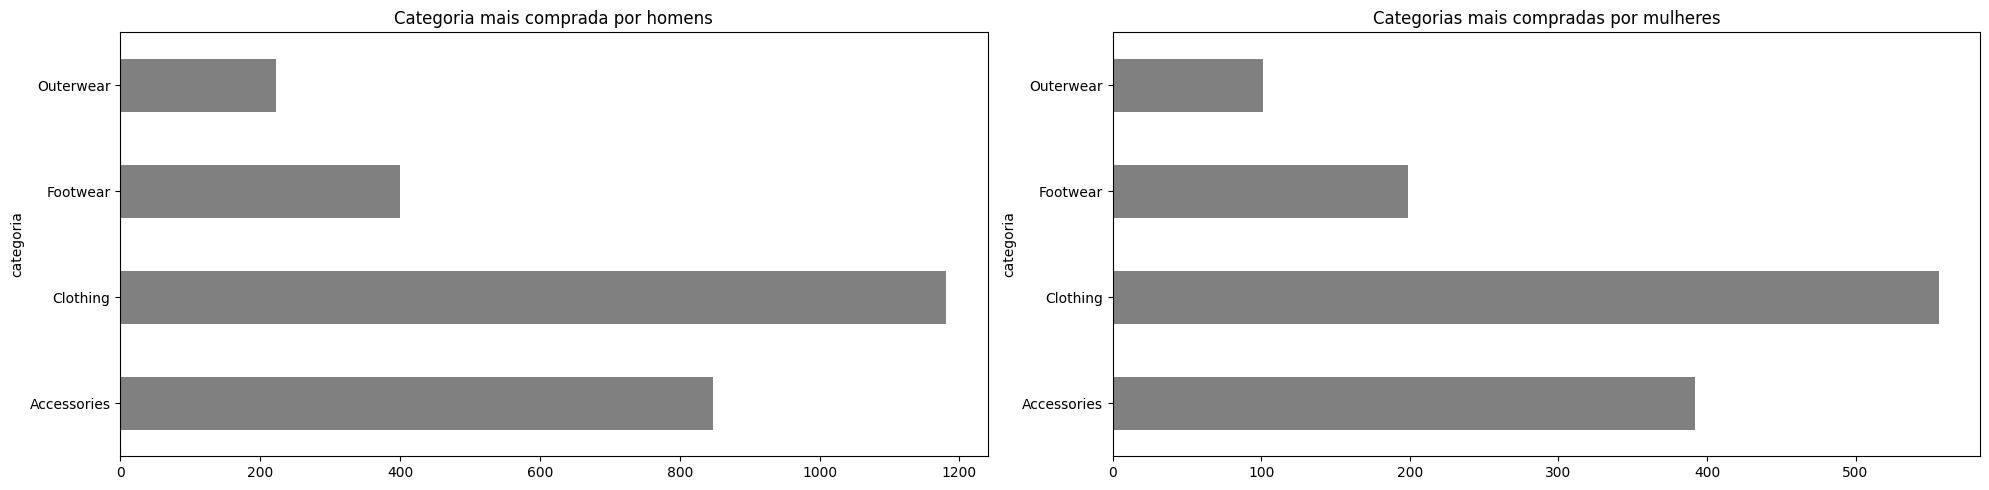

In [13]:
#Categorias mais vendidas por Gênero
categoria_homens = df[df['Genero'] == 'Male'].groupby('categoria').size()
categoria_mulher = df[df['Genero'] == 'Female'].groupby('categoria').size()

#Gráfico
plt.figure(figsize=(20, 5))
#Homens
plt.subplot(1, 2, 1)
categoria_homens.plot.barh(color = 'gray', title='Categoria mais comprada por homens')

#Mulheres
plt.subplot(1, 2, 2)
categoria_mulher.plot.barh(color = 'gray', title = 'Categorias mais compradas por mulheres')

plt.tight_layout()
plt.show()

In [14]:
#Média valor de compra por gênero
media_gasto_genero = df.groupby('Genero')['Valor da Compra (USD)'].mean()
media_gasto_genero

Genero
Female    60.249199
Male      59.536199
Name: Valor da Compra (USD), dtype: float64

metodo pagamento preferido
PayPal           17.358974
Credit Card      17.205128
Cash             17.179487
Debit Card       16.307692
Venmo            16.256410
Bank Transfer    15.692308
dtype: float64

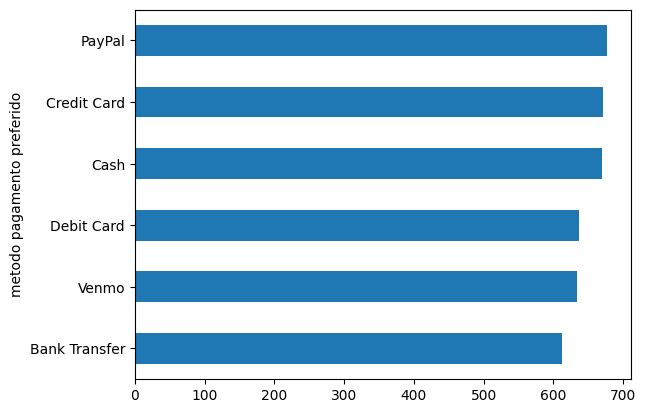

In [15]:
#Metodo de pagamento preferido

pagamento_preferido = df["metodo pagamento preferido"].value_counts()
pagamento_preferido = pagamento_preferido.sort_values(ascending=True)
#Em Gráfico
pagamento_preferido.plot.barh()

#Em Porcentagem (%)
percentual = df.groupby('metodo pagamento preferido').size()
percentual = (percentual / percentual.sum())*100
percentual = percentual.sort_values(ascending=False)
percentual


status_assinatura
No     73.0
Yes    27.0
dtype: float64

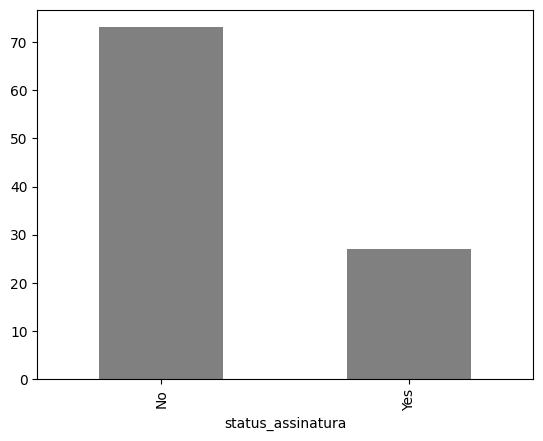

In [16]:
#Assinatura Clientes

assinatura = df.groupby('status_assinatura').size()
assinatura = (assinatura / assinatura.sum())*100

#Em Gráfico
assinatura.plot.bar(color = 'gray')

#Em Porcentagem (%)
assinatura

In [17]:
#Frequência de Compra dos Clientes numericamente.

#Juntado os resultados "Every 3 Months" (A cada 3 Meses) com "Quarterly" (Trimestral), pois ambos são as mesmas coisa.
df.loc[df['frequencia de compras'] == 'Every 3 Months', 'frequencia de compras'] = 'Quarterly'

#Em quantidade
frequencia_compras = df.groupby('frequencia de compras').size()
frequencia_compras

frequencia de compras
Annually        572
Bi-Weekly       547
Fortnightly     542
Monthly         553
Quarterly      1147
Weekly          539
dtype: int64

<Axes: ylabel='frequencia de compras'>

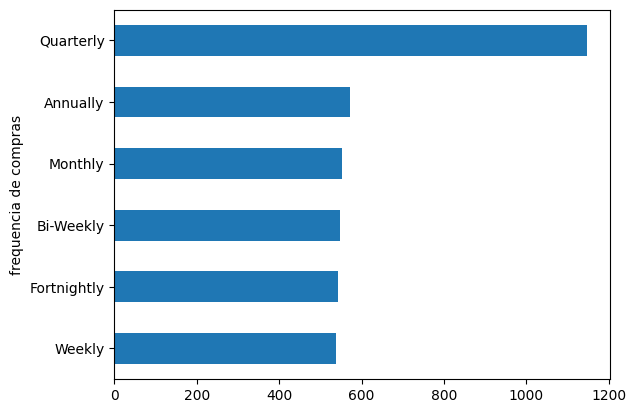

In [18]:
#Frequência de Compra graficamente (para melhor visualização).
frequencias = df.groupby('frequencia de compras').size()
frequencias = frequencias.sort_values(ascending=True)
frequencias.plot.barh()

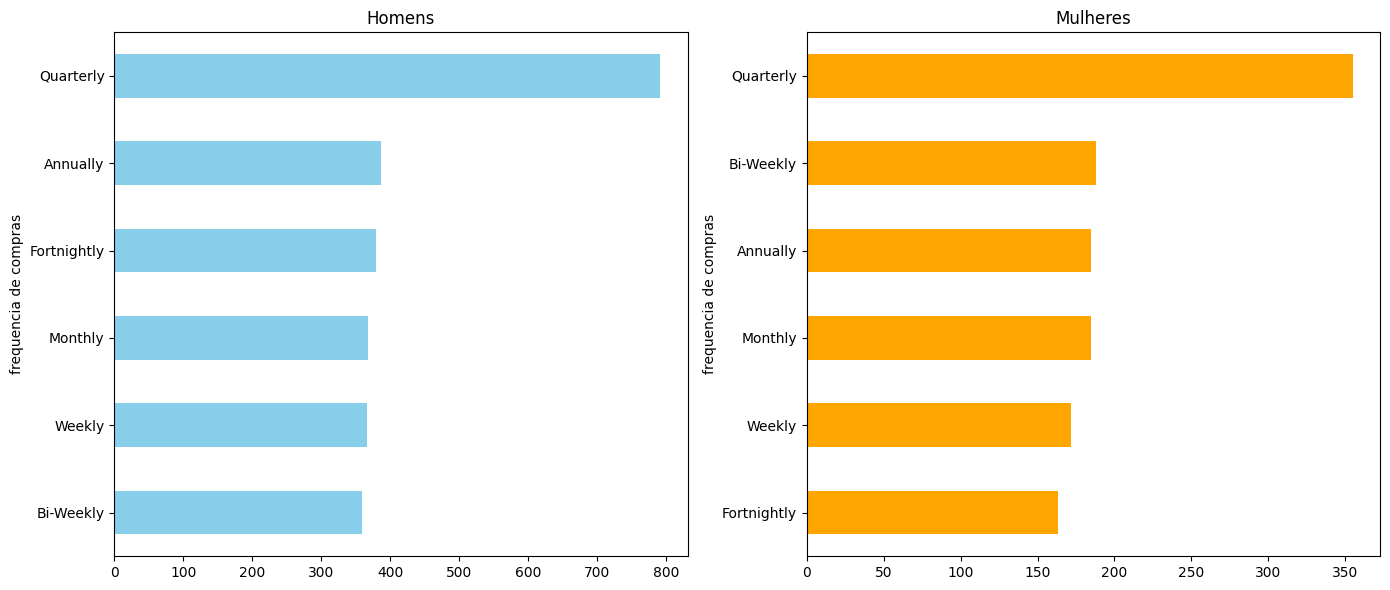

In [19]:
# Frequência de Compra por Gênero

# Frequência de compra por Homens
homens = df[df['Genero'] == 'Male'].groupby('frequencia de compras').size()
homens = homens.sort_values(ascending=True)

# Frequência de compra por Mulheres
mulheres = df[df['Genero'] == 'Female'].groupby('frequencia de compras').size()
mulheres = mulheres.sort_values(ascending=True)


# Em Gráficos (Subplots)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
homens.plot.barh(color='skyblue')
plt.title("Homens")

plt.subplot(1, 2, 2)
mulheres.plot.barh(color='orange')
plt.title("Mulheres")

#Para que um gráfico não sobrescreva outro.
plt.tight_layout()


#Perfil dos Clientes - Conclusão

##Gênero

Há uma disparidade significativa no gênero dos clientes, com cerca de 68% dos clientes sendo homens e 32% mulheres. No entanto, é interessante notar que o público feminino gasta em média (USD 60.24), um valor ligeiramente maior por compra em comparação aos homens (USD 59.53).

Esse dado pode indicar que os produtos voltados para mulheres possuem preços mais altos ou que as mulheres optam por itens de maior valor agregado. Para evitar uma possível percepção de superfaturamento, é recomendável realizar uma análise detalhada dos preços por categoria de produtos e ajustar, se necessário. Além disso, promoções específicas para o público feminino podem ser uma estratégia eficaz para aumentar sua participação.

##Idade

A maior parte do público encontra-se na faixa de 35 a 50 anos e com mais de 60 anos, enquanto há pouca presença de jovens (menos de 25 anos) e nenhuma de menores de 18 anos. Para atrair um público mais jovem, é recomendado incluir produtos voltados para esse segmento, como roupas e calçados mais modernos. Campanhas nas redes sociais (Instagram, TikTok) também podem ser eficazes.


##Método de Pagamento

Os métodos de pagamento preferidos são PayPal (17.35%), Cartão de Crédito (17.20%) e dinheiro em espécie (17.17%). Para incentivar pagamentos em dinheiro, que têm menores custos de operação, a loja pode oferecer pequenos descontos ou benefícios adicionais para clientes que utilizem essa modalidade.


##Fidelidade

Atualmente, 73% dos clientes não possuem assinatura. Isso pode indicar falta de atratividade ou divulgação limitada do programa de assinaturas. Recomenda-se:

*1- Oferecer benefícios claros, como descontos exclusivos, frete grátis ou sorteios periódicos.*

*2- Campanhas promocionais específicas, como "ganhe um desconto de 30% ao assinar hoje".*


Além disso, a maioria dos clientes retorna à loja a cada 3 meses. Descontos ou promoções para clientes mensais podem ser testados para aumentar a frequência de compras.

#ÁNALISE DE VENDAS

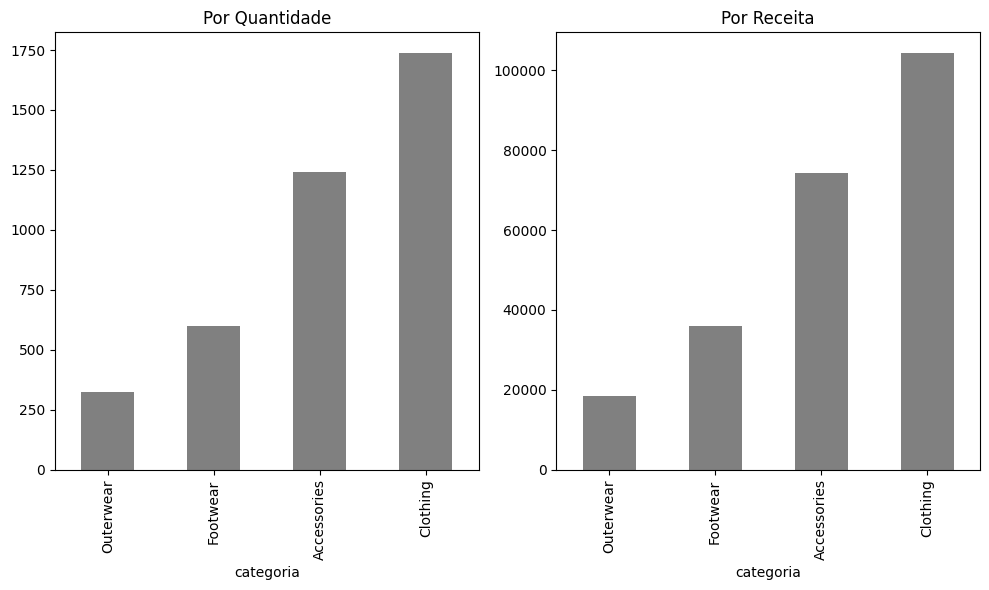

In [20]:
#Categorias mais vendidas

# Categorias mais Vendidas por Quantidade
qnt_categoria = df.groupby('categoria').size()
qnt_categoria = qnt_categoria.sort_values(ascending=True)

# Categorias que Mais Geraram Receita
receita_categoria = df.groupby('categoria')['Valor da Compra (USD)'].sum()
receita_categoria = receita_categoria.sort_values(ascending=True)

#Em Gráficos (subplots)
plt.figure(figsize=(10, 6))

#Gráfico por Quantidade (Esquerdo)
plt.subplot(1, 2, 1)
qnt_categoria.plot.bar(color = 'gray')
plt.title('Por Quantidade')

#Gráfico por Receita (Direito)
plt.subplot(1, 2, 2)
receita_categoria.plot.bar(color = 'gray')
plt.title('Por Receita')

plt.tight_layout()
plt.show()

####OBS: AS CATEGORIAS AGASALHOS E CALÇADOS POSSUI DEMANAS MUITO BAIXA EM COMPARAÇÃO AOS ACESSÓRIOS E ROUPAS

In [21]:
# Calcular a média de preço por categoria
media_preco_categoria = receita_categoria / qnt_categoria
media_preco_categoria

categoria
Outerwear      57.172840
Footwear       60.255426
Accessories    59.838710
Clothing       60.025331
dtype: float64

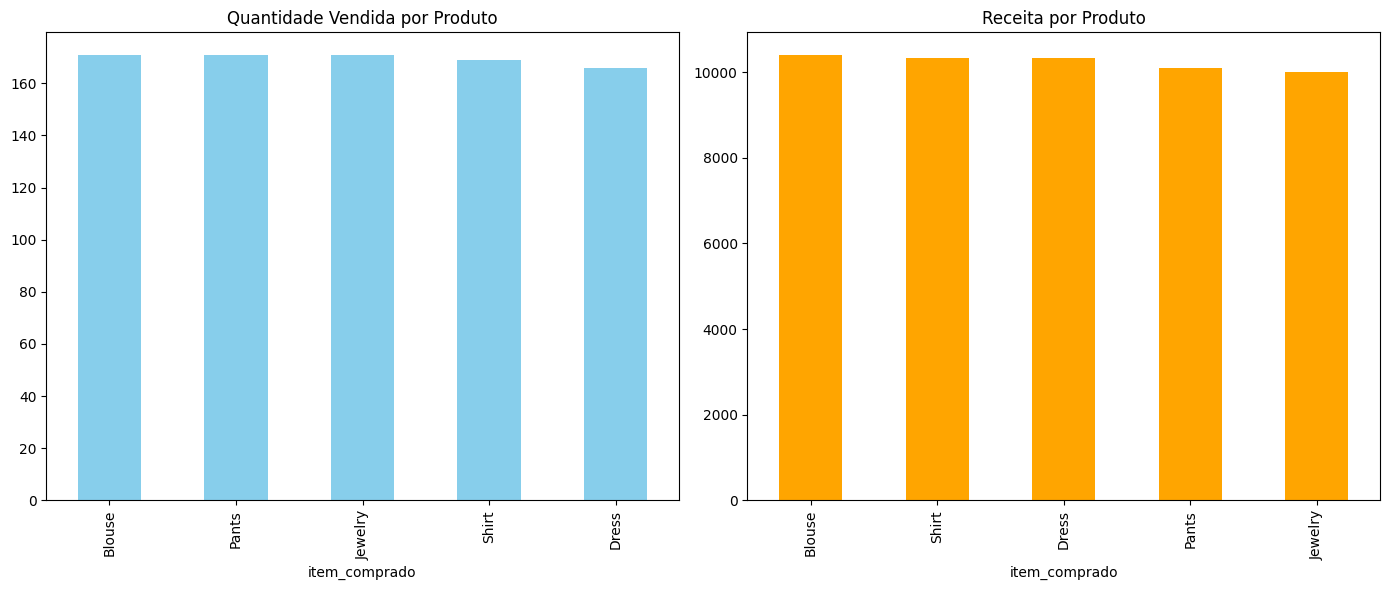

In [22]:
#Produtos

# Produtos com MAIS vendas
produtos = df.groupby('item_comprado').size()
produtos = produtos.sort_values(ascending=False)
produtos = produtos.head(5)

# Produtos que MAIS geram receitas
receita = df.groupby('item_comprado')['Valor da Compra (USD)'].sum()
receita = receita.sort_values(ascending=False)
receita = receita.head(5)

#Em Gráficos (subplots)
plt.figure(figsize=(14, 6))

#Produtos por Quantidade Vendida
plt.subplot(1, 2, 1)
produtos.plot.bar(color='skyblue')
plt.title("Quantidade Vendida por Produto")

#Produtos por receita Gerada
plt.subplot(1, 2, 2)
receita.plot.bar(color='orange')
plt.title("Receita por Produto")

plt.tight_layout()

plt.show()

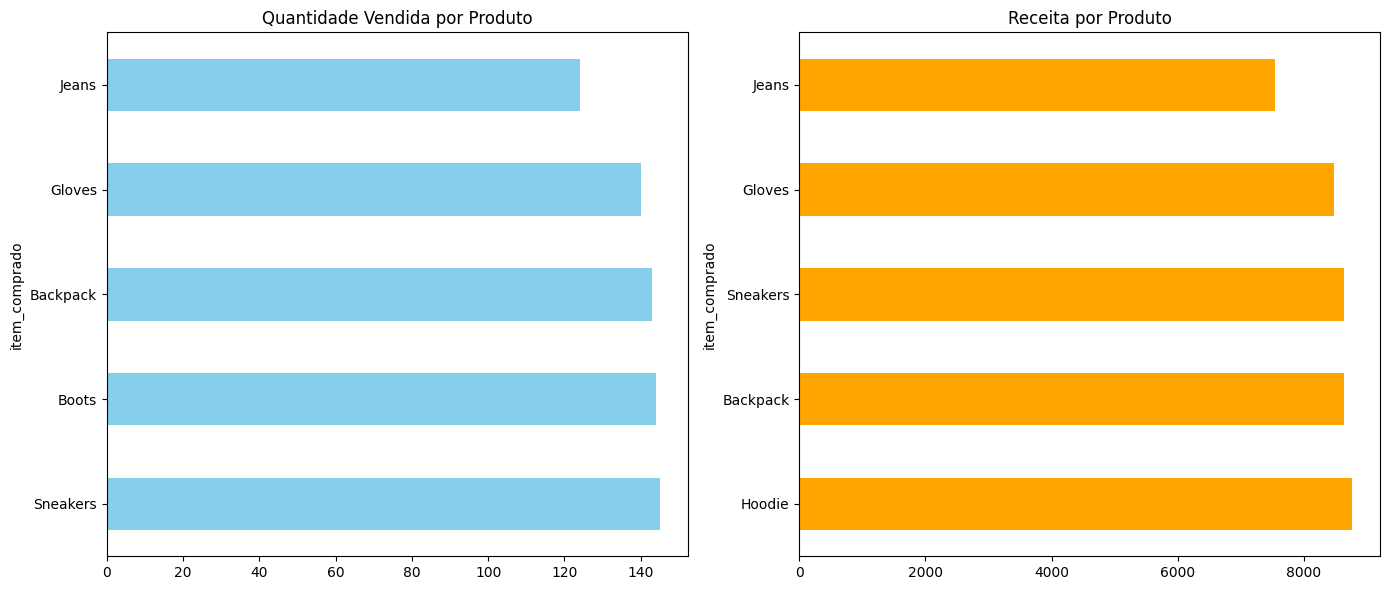

In [23]:
#Produtos com MENOS vendas
produtos = df.groupby('item_comprado').size()
produtos = produtos.sort_values(ascending=False)
produtos = produtos.tail(5)

# Produtos que MENOS geram receitas
receita = df.groupby('item_comprado')['Valor da Compra (USD)'].sum()
receita = receita.sort_values(ascending=False)
receita = receita.tail(5)


# Em Gráficos (subplots)
plt.figure(figsize=(14, 6))

#Produtos que MENOS vendem (Quantidade)
plt.subplot(1, 2, 1)
produtos.plot.barh(color='skyblue')
plt.title("Quantidade Vendida por Produto")

#Produtos que MENOS geram receita
plt.subplot(1, 2, 2)
receita.plot.barh(color='orange')
plt.title("Receita por Produto")

plt.tight_layout()
plt.show()

In [24]:
df['estaçao'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

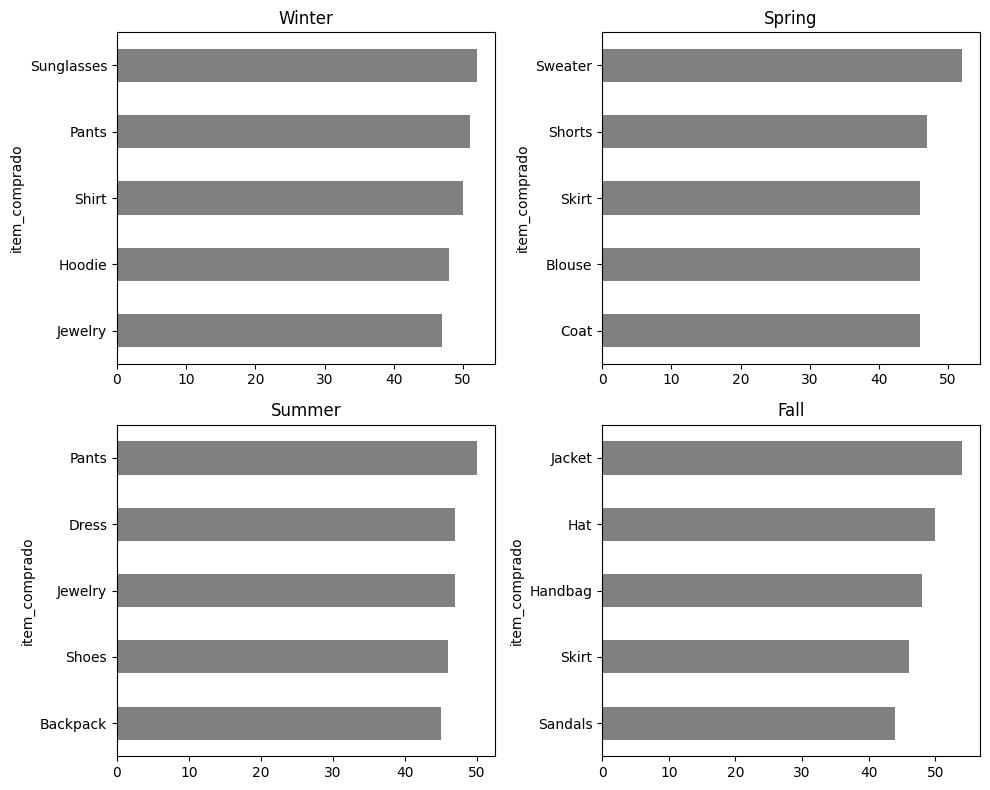

In [25]:
#Produtos mais vendidos por estação (Quantidade)

# Agrupar e obter os 5 produtos mais vendidos por estação
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
top_items = {season: df[df['estaçao'] == season].groupby('item_comprado').size().nlargest(5) for season in seasons}

# Configurar o layout dos subgráficos
plt.figure(figsize=(10, 8))
for i, (season, data) in enumerate(top_items.items(), 1):
    plt.subplot(2, 2, i)
    data.sort_values().plot.barh(color='gray')
    plt.title(season)

plt.tight_layout()
plt.show()


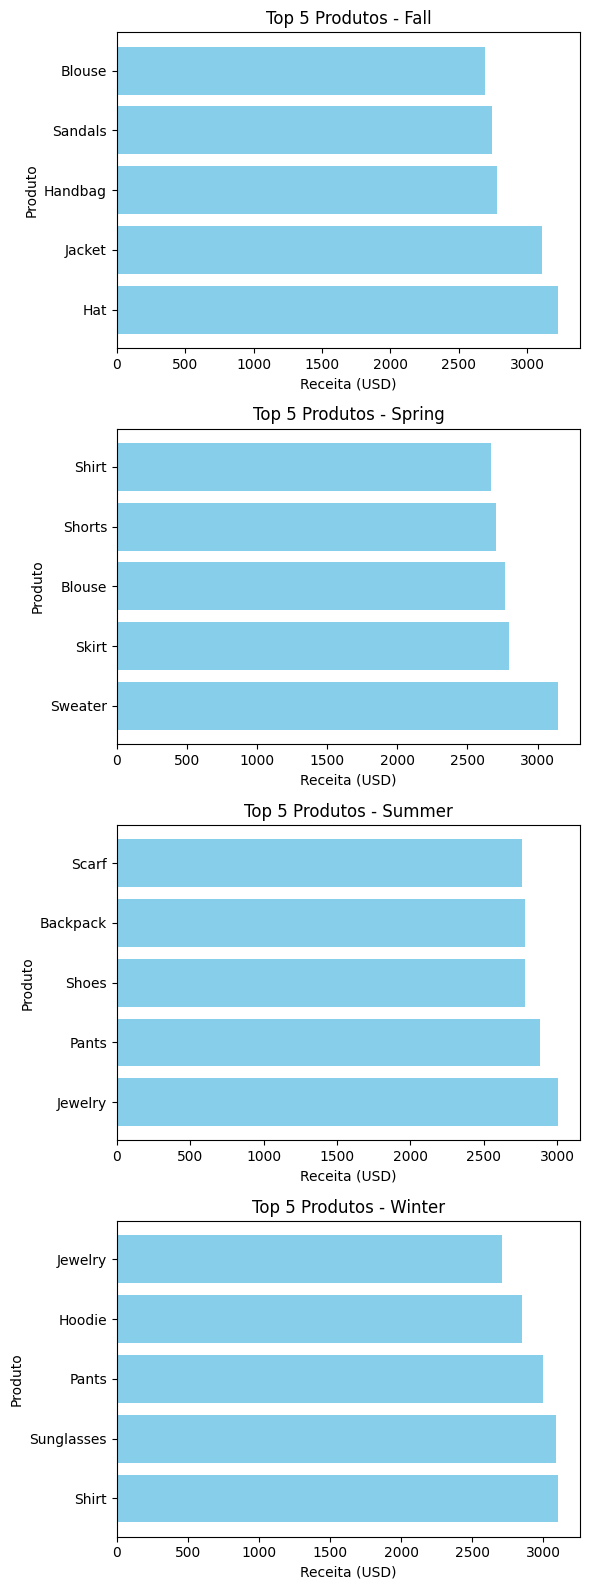

In [26]:
#Produtos que mais geram receita por estação

# Calcular receita total por item e estação, selecionar os 5 maiores por estação
top_revenue_items = (
    df.groupby(['estaçao', 'item_comprado'])['Valor da Compra (USD)']
    .sum()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
    .reset_index()
)

# Criar subplots para cada estação
estações = top_revenue_items['estaçao'].unique()
fig, axes = plt.subplots(nrows=len(estações), figsize=(6, 4 * len(estações)))

for ax, estacao in zip(axes, estações):
    dados_estacao = top_revenue_items[top_revenue_items['estaçao'] == estacao]
    ax.barh(dados_estacao['item_comprado'], dados_estacao['Valor da Compra (USD)'], color='skyblue')
    ax.set_title(f'Top 5 Produtos - {estacao}')
    ax.set_xlabel('Receita (USD)')
    ax.set_ylabel('Produto')

plt.tight_layout()
plt.show()


<Axes: ylabel='estaçao'>

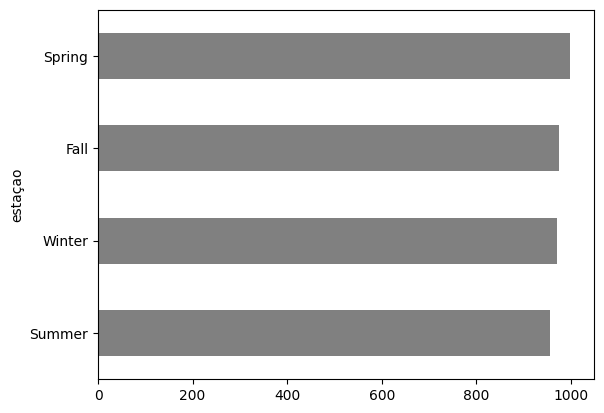

In [27]:
#Estação que mais vendem (por Quantidade)

estacao = df.groupby('estaçao').size()
estacao = estacao.sort_values(ascending=True)

#Gráfico
estacao.plot.barh(color = 'gray')

In [28]:
df['avaliacao_produto'].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: avaliacao_produto, dtype: float64

<Axes: ylabel='avaliacao_produto'>

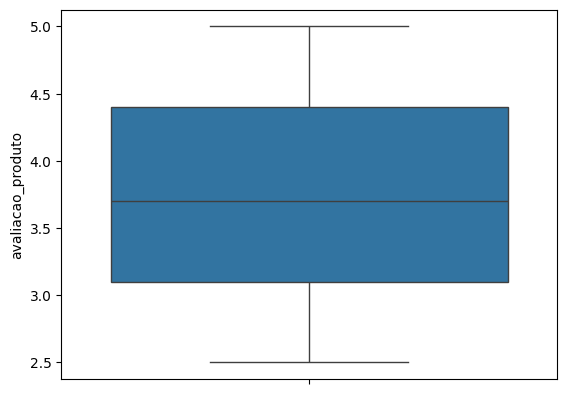

In [29]:
sns.boxplot(df['avaliacao_produto'])

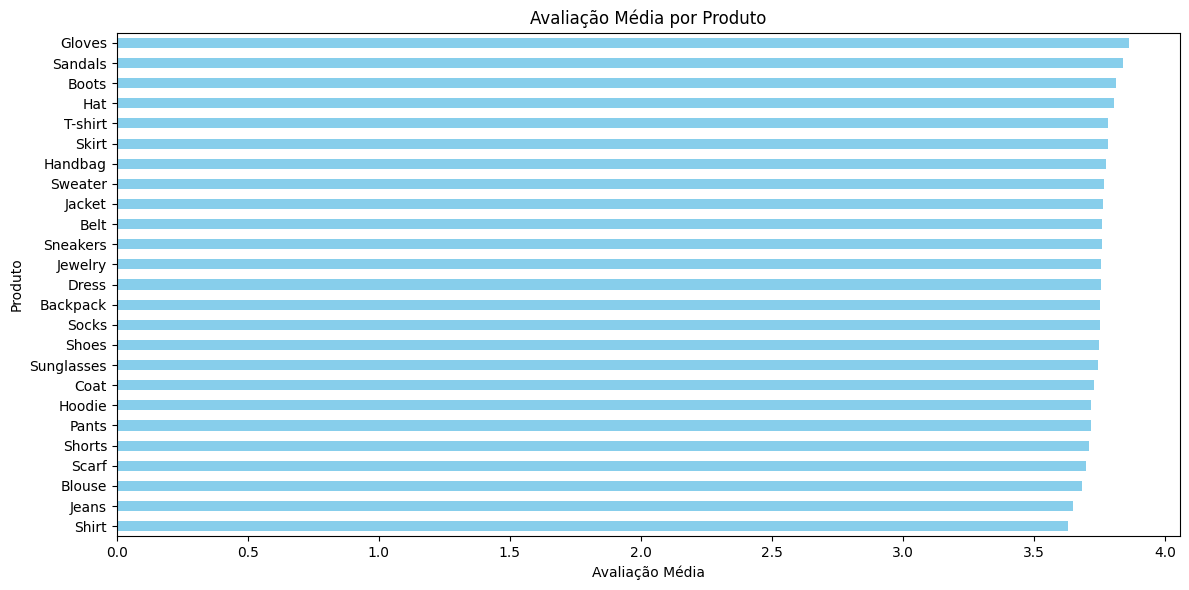

In [30]:
# Avaliação Produtos

# Agrupar por item e calcular a média das avaliações
avaliacao_produto = df.groupby('item_comprado')['avaliacao_produto'].mean()

# Plotando um gráfico de barras das avaliações médias por produto
plt.figure(figsize=(12, 6))
avaliacao_produto.sort_values().plot(kind='barh', color='skyblue')
plt.title('Avaliação Média por Produto')
plt.xlabel('Avaliação Média')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


In [31]:
avaliacao_media = round(df['avaliacao_produto'].mean(), 1)
avaliacao_media

# Criar um DataFrame com o resultado
avaliacao_df = pd.DataFrame({'Metrica': ['Avaliação Média'], 'Valor': [avaliacao_media]})

In [32]:
#Metodos de entregas
df['tipo de frete'].value_counts()

tipo de frete
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

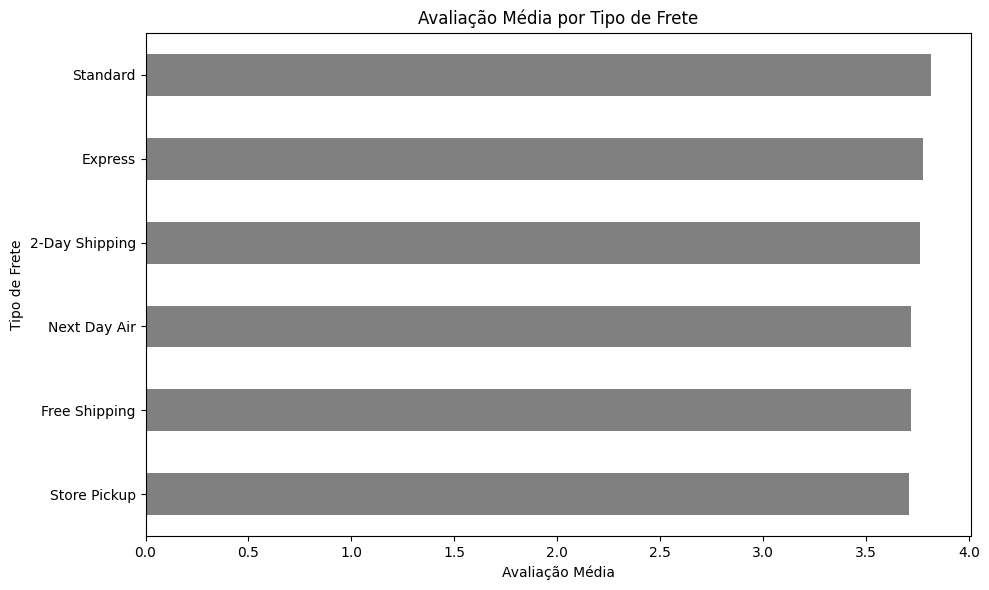

In [33]:
# Avaliação Média dos Produtos por Tipo de Frete
avaliacao_frete = df.groupby('tipo de frete')['avaliacao_produto'].mean()

# display(avaliacao_frete)

# Plotando um gráfico de barras das avaliações médias por tipo de frete
plt.figure(figsize=(10, 6))
avaliacao_frete.sort_values().plot(kind='barh', color='gray')
plt.title('Avaliação Média por Tipo de Frete')
plt.xlabel('Avaliação Média')
plt.ylabel('Tipo de Frete')
plt.tight_layout()
plt.show()

# ÁNALISE DE VENDAS - CONCLUSÃO

##**CATEGORIAS**:

Com base nos Dados analisados, é possível perceber que há uma disparidade ENORME na demanda por calçados e agasalhos em comparação com as demais categorias nas lojas, mesmo com as médias de preços não sendo tão distantes. Talvez promoções devessem ser feita com tais categorias, para que não ocupem estoque "atoa", e aumente a demanda e a divulgação de tais categorias.

##**PRODUTOS**

A avaliação média dos produtos (3.7) é boa, porém, não é execelente. Uma melhoria na qualidade dos produtos, como a troca de fornecedores se possível, pode ser agradavél a loja.

*(O tipo de frete não aparenta influênciar na Avaliação do Produto, então as problabilidades de que as Avaliações dos produtos estão "mediana" por possíveis más/erros na entregas não são reais)*



##**ESTAÇÕES**

Não há grandes diferenças nas vendas por estações, entretanto, no Verão as vendas tendem a ter uma leve queda.

#LOGÍSTICA


<Axes: ylabel='tipo de frete'>

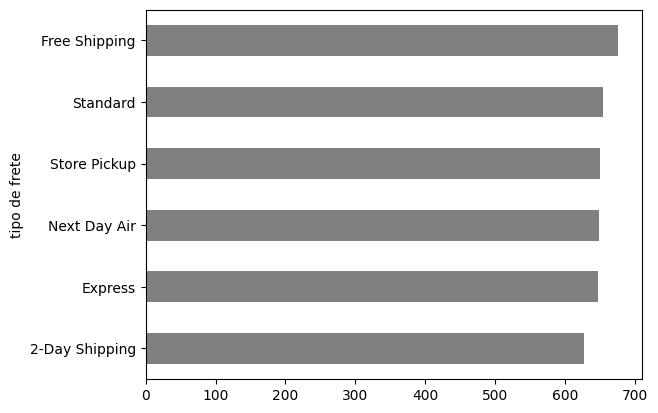

In [34]:
#Tipos de frete mais usados

frete = df['tipo de frete'].value_counts()
frete = frete.sort_values(ascending=True)

#Gráfico
frete.plot.barh(color = 'gray')

In [35]:
#Principais Regiões de Vendas

localiza = df['Localizacao'].value_counts()
localiza = localiza.sort_values(ascending=False)
localiza = localiza.head(10)
localiza

Localizacao
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
New York      87
Nevada        87
Nebraska      87
Delaware      86
Name: count, dtype: int64

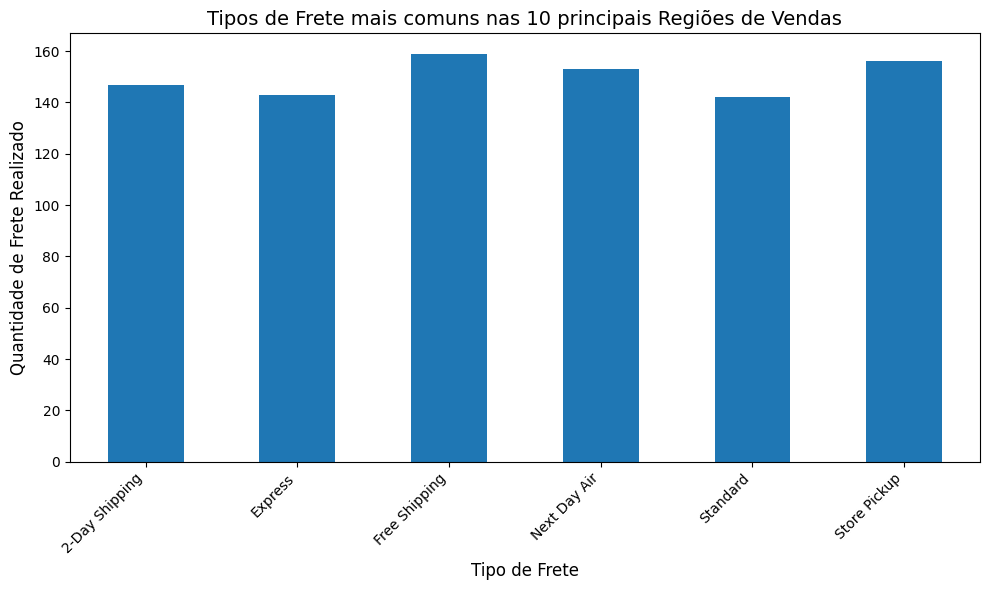

In [36]:
#Tipos de Frete mais comuns nas 10 principais Regiões de Vendas

localiza = df['Localizacao'].value_counts().head(10)

# Filtrar os dados para as 10 regiões mais frequentes
df_filtrado = df[df['Localizacao'].isin(localiza.index)]

#tipo de frete
frete_por_tipo = df_filtrado.groupby('tipo de frete').size()

#gráfico
frete_por_tipo.plot(kind='bar', figsize=(10, 6))

plt.title('Tipos de Frete mais comuns nas 10 principais Regiões de Vendas', fontsize=14)
plt.xlabel('Tipo de Frete', fontsize=12)
plt.ylabel('Quantidade de Frete Realizado', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Ajustar a rotação dos rótulos no eixo X
plt.tight_layout()
plt.show()

#LOGÍSTICA - CONCLUSÃO

Os tipos de Frete, com base nesses Dados, estão todos OK.

Talvez um desconto nas entregas as Regiões que mais compram, possa ser benéfico as lojas.

In [37]:
#RECEITA TOTAL (em dólar americano)
receita_total = df['Valor da Compra (USD)'].sum()
display(f'USD {receita_total}')

'USD 233081'